<a href="https://colab.research.google.com/github/smbrmoyo/ICC_SVM/blob/main/Icc_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data_icc = pd.read_csv("drive/MyDrive/icc.csv",delimiter=';')
data_options = pd.read_csv("drive/MyDrive/icc_options.csv",delimiter=';')
data_icc.shape
#data_options.shape

(244398, 26)

In [ ]:
data = pd.merge(data_icc, data_options, how='outer',on='conf_id')
data.sample(10)

,row ID_x,conf_id,porschecode,recommendation_id,c_nr,gg_id,btyp_x,mj_4,mj_1,usage_count,last_access,config_sendtodeal,sendtodeal_timestamp,config_shared,shared_timestamp,config_print,printed_timestamp,config_saved,saved_timestamp,region,creationtime,quality,icc_dcc,created_from_pre_config,l_aend_x,loaddate_x,row ID_y,btyp_y,option_key,ausstatt_kz,ausstatt_alt,option_category_id,option_type_id,option_group_id,option_visual_group_id,l_aend_y,loaddate_y
2346893,Row212553,35379316,PMGVHJ30,NaN,C36,72,9YAAA1,2021,M,0,2020-08-04T17:05:38.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,NaN,2020-08-04T17:05:38.0,0.0,I,0,2020-08-06T10:53:12.63,2020-08-06T10:53:12.63,Row2655106,9YAAA1,P_P_PFE,P,PFE,IIF,P,NaN,NaN,2020-08-06T11:55:19.750,2020-08-06T11:55:19.750
2579904,Row233677,35136696,PM81LNK8,NaN,C36,72,9YAAA1,2021,M,0,2020-07-29T17:31:51.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,NaN,2020-07-29T17:31:51.0,0.0,D,0,2020-08-06T10:50:48.203,2020-08-06T10:50:48.203,Row2489164,9YAAA1,F_AF_C7,F,C7,IAF,AF,NaN,Aussenfarbe,2020-08-06T11:55:19.750,2020-08-06T11:55:19.750
2614040,Row236565,35207569,PLY95X64,NaN,C00,11,9YAAA1,2020,L,2,2020-08-05T10:22:43.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,1,2020-07-31T12:29:42.0,0,1900-01-01T00:00:00.0,NaN,2020-07-31T12:24:24.0,0.0,D,0,2020-08-06T10:53:20.517,2020-08-06T10:53:20.517,Row2536149,9YAAA1,F_AF_3H,F,3H,IAF,AF,NaN,Aussenfarbe,2020-08-06T11:55:19.750,2020-08-06T11:55:19.750
323927,Row29789,31905705,PLQ35FV0,NaN,C33,261,9YAAA1,2020,L,0,2020-05-18T05:10:25.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,NaN,2020-05-18T05:10:25.0,0.0,D,0,2020-06-21T11:34:21.713,2020-06-21T11:34:21.713,Row713892,9YAAA1,M_E_0P3,M,0P3,IIF,E,NaN,NaN,2020-06-24T17:16:18.593,2020-06-24T17:16:18.593
418792,Row38541,31640064,PLX4YSQ8,NaN,C33,261,9YAAA1,2020,L,0,2020-05-09T09:24:15.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,NaN,2020-05-09T09:24:15.0,0.0,D,0,2020-06-21T11:32:43.120,2020-06-21T11:32:43.120,Row687033,9YAAA1,M_M_9VL,M,9VL,IIF,M,NaN,NaN,2020-06-24T17:16:18.593,2020-06-24T17:16:18.593
863502,Row78022,32644009,PMZUF2T5,NaN,C02,46,9YAAA1,2021,M,0,2020-06-07T16:10:43.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,1,2020-06-07T16:10:43.0,0,1900-01-01T00:00:00.0,NaN,2020-06-07T16:09:21.0,0.0,I,0,2020-06-21T11:39:31.587,2020-06-21T11:39:31.587,Row1208376,9YAAA1,M_M_QZ7,M,QZ7,IIF,M,NaN,NaN,2020-06-24T17:16:18.593,2020-06-24T17:16:18.593
1848733,Row166980,33656436,PLDWV4F9,NaN,C33,261,9YAAA1,2020,L,0,2020-06-30T07:18:36.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,NaN,2020-06-30T07:18:31.0,0.0,D,0,2020-07-13T18:18:41.837,2020-07-13T18:18:41.837,Row1845772,9YAAA1,M_M_43D,M,43D,IIF,M,NaN,Rad,2020-08-06T11:55:19.750,2020-08-06T11:55:19.750
2006330,Row181436,34160413,PLUMZT81,NaN,C33,261,9YAAA1,2020,L,0,2020-07-06T11:15:55.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,NaN,2020-07-06T11:15:55.0,0.0,D,0,2020-07-13T18:22:40.337,2020-07-13T18:22:40.337,Row1974037,9YAAA1,M_M_9VL,M,9VL,IIF,M,NaN,NaN,2020-08-06T11:55:19.750,2020-08-06T11:55:19.750
1340477,Row120754,33140459,PMR2LGB0,NaN,C33,261,992120,2021,M,0,2020-06-18T12:13:35.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,1,2020-06-18T12:13:35.0,0,1900-01-01T00:00:00.0,NaN,2020-06-18T12:13:09.0,0.0,I,0,2020-06-21T11:44:30.370,2020-06-21T11:44:30.370,Row1485087,992120,M_M_8LH,M,8LH,IIF,M,NaN,NaN,2020-06-24T17:16:18.593,2020-06-24T17:16:18.593
1071145,Row96626,32847247,PLXM6FA8,NaN,C33,261,9YAAA1,2020,L,0,2020-06-12T04:53:01.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,NaN,2020-06-12T04:52:59.0,0.0,D,0,2020-06-21T11:41:22.400,2020-06-21T11:41:22.400,Row1276548,9YAAA1,M_M_9JB,M,9JB,IIF,M,NaN,NaN,2020-06-24T1

In [ ]:
data['config_sendtodeal'].value_counts()

1    51713
0    51713
Name: config_sendtodeal, dtype: int64

In [ ]:
data = data.drop(data[data['config_sendtodeal']==0].index[:2594832])

In [ ]:
len(data['ausstatt_alt'].unique())

441

In [ ]:
data[data["option_category_id"] == 'IIF']

,row ID_x,conf_id,porschecode,recommendation_id,c_nr,gg_id,btyp_x,mj_4,mj_1,usage_count,last_access,config_sendtodeal,sendtodeal_timestamp,config_shared,shared_timestamp,config_print,printed_timestamp,config_saved,saved_timestamp,region,creationtime,quality,icc_dcc,created_from_pre_config,l_aend_x,loaddate_x,row ID_y,btyp_y,option_key,ausstatt_kz,ausstatt_alt,option_category_id,option_type_id,option_group_id,option_visual_group_id,l_aend_y,loaddate_y
2359,Row244,30524597,PLJT8PX2,NaN,C33,261,9YAAA1,2020,L,0,2020-03-30T00:00:00.0,1,2020-03-30T00:00:00.0,0,NaN,0,NaN,0,NaN,NaN,2020-03-30T00:00:00.0,0.0,I,0,2020-04-01T18:45:51.47,2020-04-01T18:45:51.47,Row113400,9YAAA1,I_IA_QM,I,QM,IIF,IA,NaN,Innenfarbe,2020-04-03T11:33:24.233,2020-04-03T11:33:24.233
2360,Row244,30524597,PLJT8PX2,NaN,C33,261,9YAAA1,2020,L,0,2020-03-30T00:00:00.0,1,2020-03-30T00:00:00.0,0,NaN,0,NaN,0,NaN,NaN,2020-03-30T00:00:00.0,0.0,I,0,2020-04-01T18:45:51.47,2020-04-01T18:45:51.47,Row113401,9YAAA1,M_M_43E,M,43E,IIF,M,NaN,Rad,2020-04-03T11:33:24.233,2020-04-03T11:33:24.233
2361,Row244,30524597,PLJT8PX2,NaN,C33,261,9YAAA1,2020,L,0,2020-03-30T00:00:00.0,1,2020-03-30T00:00:00.0,0,NaN,0,NaN,0,NaN,NaN,2020-03-30T00:00:00.0,0.0,I,0,2020-04-01T18:45:51.47,2020-04-01T18:45:51.47,Row113402,9YAAA1,M_M_8IS,M,8IS,IIF,M,NaN,NaN,2020-04-03T11:33:24.233,2020-04-03T11:33:24.233
2362,Row244,30524597,PLJT8PX2,NaN,C33,261,9YAAA1,2020,L,0,2020-03-30T00:00:00.0,1,2020-03-30T00:00:00.0,0,NaN,0,NaN,0,NaN,NaN,2020-03-30T00:00:00.0,0.0,I,0,2020-04-01T18:45:51.47,2020-04-01T18:45:51.47,Row113403,9YAAA1,P_P_PN1,P,PN1,IIF,P,NaN,NaN,2020-04-03T11:33:24.233,2020-04-03T11:33:24.233
2512,Row255,30524700,PL9YHPZ8,NaN,C33,261,9YAAA1,2020,L,0,2020-03-30T00:00:00.0,1,2020-03-30T00:00:00.0,0,NaN,0,NaN,0,NaN,NaN,2020-03-30T00:00:00.0,0.0,I,0,2020-04-01T18:45:51.47,2020-04-01T18:45:51.47,Row114844,9YAAA1,I_IA_AL,I,AL,IIF,IA,NaN,Innenfarbe,2020-04-03T11:33:24.233,2020-04-03T11:33:24.233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698253,Row244397,33575428,PMEW6HM9,NaN,C33,261,9YAAA1,2021,M,1,2020-06-29T04:10:58.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,NaN,2020-06-28T11:34:00.0,0.0,D,0,2020-07-13T18:18:28.423,2020-07-13T18:18:28.423,Row1756068,9YAAA1,M_M_9JB,M,9JB,IIF,M,NaN,NaN,2020-08-06T11:55:19.750,2020-08-06T11:55:19.750
2698254,Row244397,33575428,PMEW6HM9,NaN,C33,261,9YAAA1,2021,M,1,2020-06-29T04:10:58.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,NaN,2020-06-28T11:34:00.0,0.0,D,0,2020-07-13T18:18:28.423,2020-07-13T18:18:28.423,Row1756069,9YAAA1,M_M_GZ2,M,GZ2,IIF,M,NaN,NaN,2020-08-06T11:55:19.750,2020-08-06T11:55:19.750
2698255,Row244397,33575428,PMEW6HM9,NaN,C33,261,9YAAA1,2021,M,1,2020-06-29T04:10:58.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,NaN,2020-06-28T11:34:00.0,0.0,D,0,2020-07-13T18:18:28.423,2020-07-13T18:18:28.423,Row1756070,9YAAA1,M_M_KA2,M,KA2,IIF,M,NaN,NaN,2020-08-06T11:55:19.750,2020-08-06T11:55:19.750
2698256,Row244397,33575428,PMEW6HM9,NaN,C33,261,9YAAA1,2021,M,1,2020-06-29T04:10:58.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,NaN,2020-06-28T11:34:00.0,0.0,D,0,2020-07-13T18:18:28.423,2020-07-13T18:18:28.423,Row1756071,9YAAA1,M_M_QQ1,M,QQ1,IIF,M,NaN,NaN,2020-08-06T11:55:19.750,2020-08-06T11:55:19.750


In [ ]:
data.columns

Index(['row ID_x', 'conf_id', 'porschecode', 'recommendation_id', 'c_nr',
       'gg_id', 'btyp_x', 'mj_4', 'mj_1', 'usage_count', 'last_access',
       'config_sendtodeal', 'sendtodeal_timestamp', 'config_shared',
       'shared_timestamp', 'config_print', 'printed_timestamp', 'config_saved',
       'saved_timestamp', 'region', 'creationtime', 'quality', 'icc_dcc',
       'created_from_pre_config', 'l_aend_x', 'loaddate_x', 'row ID_y',
       'btyp_y', 'option_key', 'ausstatt_kz', 'ausstatt_alt',
       'option_category_id', 'option_type_id', 'option_group_id',
       'option_visual_group_id', 'l_aend_y', 'loaddate_y'],
      dtype='object')

In [ ]:
data.drop(['row ID_x','row ID_y', 'conf_id', 	'porschecode',
           'recommendation_id','gg_id','last_access',
           'sendtodeal_timestamp','shared_timestamp',
           'config_saved','config_print','config_shared',
           'printed_timestamp', 'saved_timestamp','region',
           'creationtime','created_from_pre_config', 
           'l_aend_x','l_aend_y',	'loaddate_x', 'loaddate_y',
           'quality','option_key','option_group_id', 	'option_visual_group_id',
           'btyp_y'],axis='columns',inplace=True)


In [ ]:
data.columns

Index(['c_nr', 'btyp_x', 'mj_4', 'mj_1', 'usage_count', 'config_sendtodeal',
       'icc_dcc', 'ausstatt_kz', 'ausstatt_alt', 'option_category_id',
       'option_type_id'],
      dtype='object')

In [ ]:
data = pd.get_dummies(data=data, columns=['c_nr','btyp_x', 	'mj_1', 'mj_4',
                                           'icc_dcc','ausstatt_kz', 'ausstatt_alt',
                                          	'option_category_id', 'option_type_id'])
data

,usage_count,config_sendtodeal,c_nr_C00,c_nr_C02,c_nr_C33,c_nr_C36,btyp_x_992120,btyp_x_9YAAA1,mj_1_K,mj_1_L,mj_1_M,mj_4_2019,mj_4_2020,mj_4_2021,icc_dcc_D,icc_dcc_E,icc_dcc_I,ausstatt_kz_C,ausstatt_kz_F,ausstatt_kz_I,ausstatt_kz_L,ausstatt_kz_M,ausstatt_kz_P,ausstatt_kz_Z,ausstatt_alt_00480,ausstatt_alt_00490,ausstatt_alt_04B,ausstatt_alt_0I2,ausstatt_alt_0L,ausstatt_alt_0M5,ausstatt_alt_0N5,ausstatt_alt_0NA,ausstatt_alt_0NC,ausstatt_alt_0NT,ausstatt_alt_0P3,ausstatt_alt_0P5,ausstatt_alt_0P6,ausstatt_alt_0P8,ausstatt_alt_0P9,ausstatt_alt_0PA,...,ausstatt_alt_YGB,ausstatt_alt_YHR,ausstatt_alt_YHU,ausstatt_alt_YLF,ausstatt_alt_YLH,ausstatt_alt_YLS,ausstatt_alt_YLV,ausstatt_alt_YMH,ausstatt_alt_YMJ,ausstatt_alt_YMK,ausstatt_alt_YML,ausstatt_alt_YMT,ausstatt_alt_YMU,ausstatt_alt_YMV,ausstatt_alt_YMW,ausstatt_alt_YPC,ausstatt_alt_YPL,ausstatt_alt_YTV,ausstatt_alt_YZB,ausstatt_alt_YZD,ausstatt_alt_YZE,ausstatt_alt_Z1S,ausstatt_alt_ZAB,ausstatt_alt_ZAC,ausstatt_alt_ZEE,ausstatt_alt_ZGA,ausstatt_alt_ZLA,ausstatt_alt_ZS,ausstatt_alt_ZU,option_category_id_IAF,option_category_id_IIF,option_type_id_AF,option_type_id_C,option_type_id_E,option_type_id_IA,option_type_id_L,option_type_id_M,option_type_id_P,option_type_id_VF,option_type_id_Z
2357,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2358,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2359,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2360,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2361,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698253,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2698254,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2698255,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2698256,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [ ]:
data['usage_count'].unique()

array([  0,   2,   1,   6,   4,  46,   7,  62,   3,  11,   9,  14,  15,
       115, 234, 171,  66,  93,  41,  13,  21, 122,  65, 207,  54, 281,
        86,  49,  17,   5,  35, 141,  40,  48, 160, 113,  33, 116,   8,
        12,  57,  85,  18,  92,  72,  67,  95, 191,  90,  69, 151,  59,
       417,  10,  39,  19,  25,  32,  24,  70,  20,  29, 149,  27,  23,
        63, 127,  28, 285,  16, 251,  36,  52,  68,  31,  37,  71,  26,
       276, 227, 164,  47,  22, 111,  60])

In [ ]:
data = pd.get_dummies(data=data, columns=['usage_count'])
data

,config_sendtodeal,c_nr_C00,c_nr_C02,c_nr_C33,c_nr_C36,btyp_x_992120,btyp_x_9YAAA1,mj_1_K,mj_1_L,mj_1_M,mj_4_2019,mj_4_2020,mj_4_2021,icc_dcc_D,icc_dcc_E,icc_dcc_I,ausstatt_kz_C,ausstatt_kz_F,ausstatt_kz_I,ausstatt_kz_L,ausstatt_kz_M,ausstatt_kz_P,ausstatt_kz_Z,ausstatt_alt_00480,ausstatt_alt_00490,ausstatt_alt_04B,ausstatt_alt_0I2,ausstatt_alt_0L,ausstatt_alt_0M5,ausstatt_alt_0N5,ausstatt_alt_0NA,ausstatt_alt_0NC,ausstatt_alt_0NT,ausstatt_alt_0P3,ausstatt_alt_0P5,ausstatt_alt_0P6,ausstatt_alt_0P8,ausstatt_alt_0P9,ausstatt_alt_0PA,ausstatt_alt_0PC,...,usage_count_57,usage_count_59,usage_count_60,usage_count_62,usage_count_63,usage_count_65,usage_count_66,usage_count_67,usage_count_68,usage_count_69,usage_count_70,usage_count_71,usage_count_72,usage_count_85,usage_count_86,usage_count_90,usage_count_92,usage_count_93,usage_count_95,usage_count_111,usage_count_113,usage_count_115,usage_count_116,usage_count_122,usage_count_127,usage_count_141,usage_count_149,usage_count_151,usage_count_160,usage_count_164,usage_count_171,usage_count_191,usage_count_207,usage_count_227,usage_count_234,usage_count_251,usage_count_276,usage_count_281,usage_count_285,usage_count_417
2357,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2358,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2359,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2360,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2361,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698253,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2698254,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2698255,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2698256,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
'''cols_to_scale = ['usage_count']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])
data'''

"cols_to_scale = ['usage_count']\n\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\ndata[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])\ndata"

In [ ]:
X = data.drop('config_sendtodeal',axis='columns')
y = data['config_sendtodeal']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
X_train.shape

(82740, 558)

In [ ]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(558 , activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1116 , activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(558 , activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, clipnorm=1.0)
cce = tf.keras.losses.CategoricalCrossentropy()

model.compile(optimizer=opt,
              loss='mse',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=64,epochs=20)

Epoch 1/20
1293/1293 [==============================] - 34s 26ms/step - loss: 0.2347 - accuracy: 0.6434
Epoch 2/20
1293/1293 [==============================] - 34s 26ms/step - loss: 0.1773 - accuracy: 0.7241
Epoch 3/20
1293/1293 [==============================] - 34s 26ms/step - loss: 0.1676 - accuracy: 0.7290
Epoch 4/20
1293/1293 [==============================] - 34s 26ms/step - loss: 0.1650 - accuracy: 0.7344
Epoch 5/20
1293/1293 [==============================] - 34s 26ms/step - loss: 0.1637 - accuracy: 0.7338
Epoch 6/20
1293/1293 [==============================] - 33s 26ms/step - loss: 0.1621 - accuracy: 0.7386
Epoch 7/20
1293/1293 [==============================] - 33s 26ms/step - loss: 0.1622 - accuracy: 0.7360
Epoch 8/20
1293/1293 [==============================] - 33s 26ms/step - loss: 0.1605 - accuracy: 0.7400
Epoch 9/20
1293/1293 [==============================] - 35s 27ms/step - loss: 0.1600 - accuracy: 0.7392
Epoch 10/20
1293/1293 [==============================] - 34s 26m

In [ ]:
model.evaluate(X_test, y_test)

647/647 [==============================] - 3s 5ms/step - loss: 0.1551 - accuracy: 0.7478


[0.15506336092948914, 0.7478004693984985]

In [ ]:
yp = model.predict(X_test)
yp[:5]

array([[0.03076029],
       [0.7089149 ],
       [0.66173095],
       [0.8922106 ],
       [0.01136583]], dtype=float32)

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

              precision    recall  f1-score   support

           0       0.79      0.67      0.73     10393
           1       0.71      0.83      0.77     10293

    accuracy                           0.75     20686
   macro avg       0.75      0.75      0.75     20686
weighted avg       0.75      0.75      0.75     20686



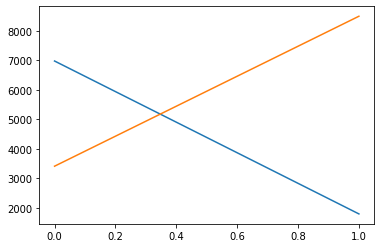

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
print(classification_report(y_test,y_pred))
plt.plot(confusion_matrix(y_test,y_pred))

Text(69.0, 0.5, 'Truth')

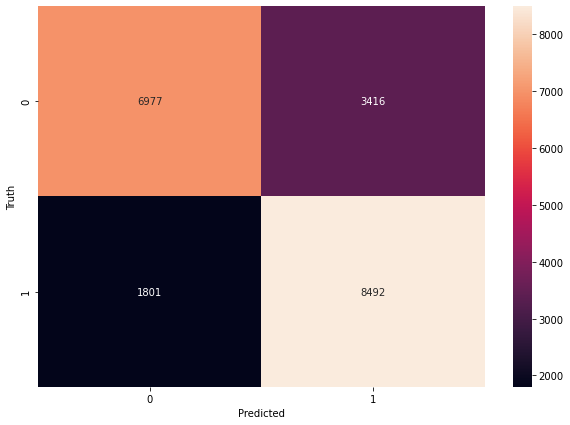

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
'''model = SVC()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)'''

'model = SVC()\nmodel.fit(X_train,y_train)\ny_predict = model.predict(X_test)'

In [ ]:
model.evaluate(X_test,y_test)

647/647 [==============================] - 3s 5ms/step - loss: 0.1551 - accuracy: 0.7478


[0.15506336092948914, 0.7478004693984985]